# EDA

## IMPORTACIÓN DE PAQUETES

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## IMPORTAR LOS DATOS

## CARGAR LOS DATOS

In [12]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num =  'num_resultado_calidad.pickle'

cat = pd.read_pickle('../../02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle('../../02_Datos/03_Trabajo/'+nombre_num)


## EDA CATEGÓRICAS

### ESTADÍSTICOS Y GRÁFICOS DE LAS VARIABLES CATEGÓRICAS

In [13]:
def estadisticos_cat(df_cat):
    #Describe Numéricas
    estadisticos = df_cat.describe().T
    return estadisticos

estadisticos_cat(cat)


,count,unique,top,freq
year,289,2,2013,209
mes,289,12,2,42


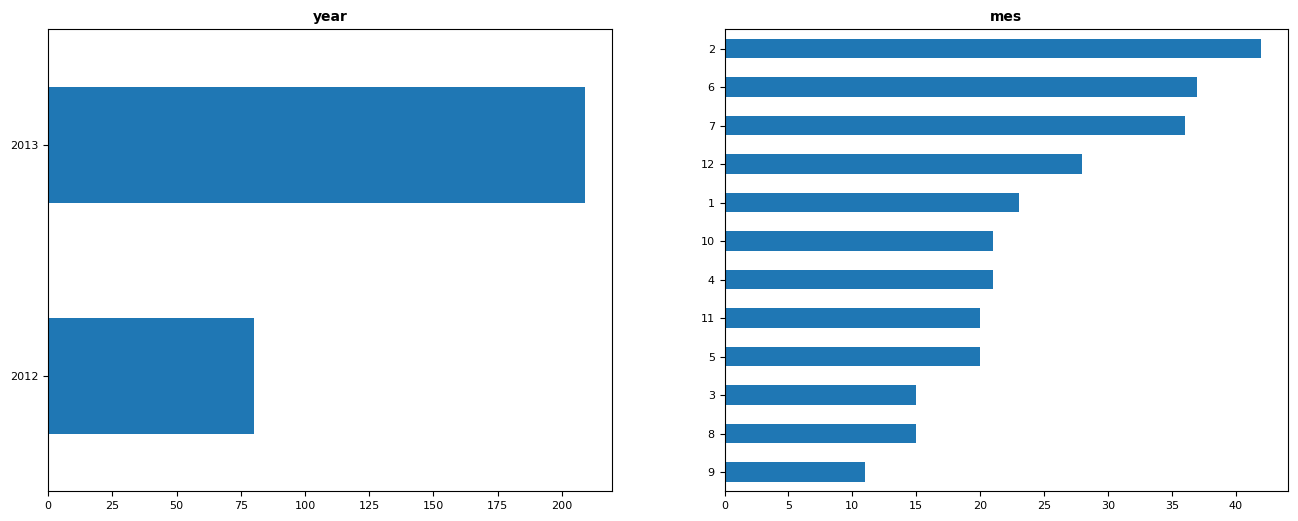

In [14]:
def graficos_eda_categoricas(df_cat):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize =(16,6))
    for cada, variable in enumerate(df_cat):
        df_cat[variable].value_counts(ascending = True).plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 10, fontweight= 'bold')
        ax[cada].tick_params(labelsize=8)

graficos_eda_categoricas(cat)

In [15]:
num.columns.to_list()

['age', 'distance_station', 'stores', 'latitude', 'longitude', 'price']

## EDA NUMÉRICAS

### CORRELACIÓN DE VARIABLES

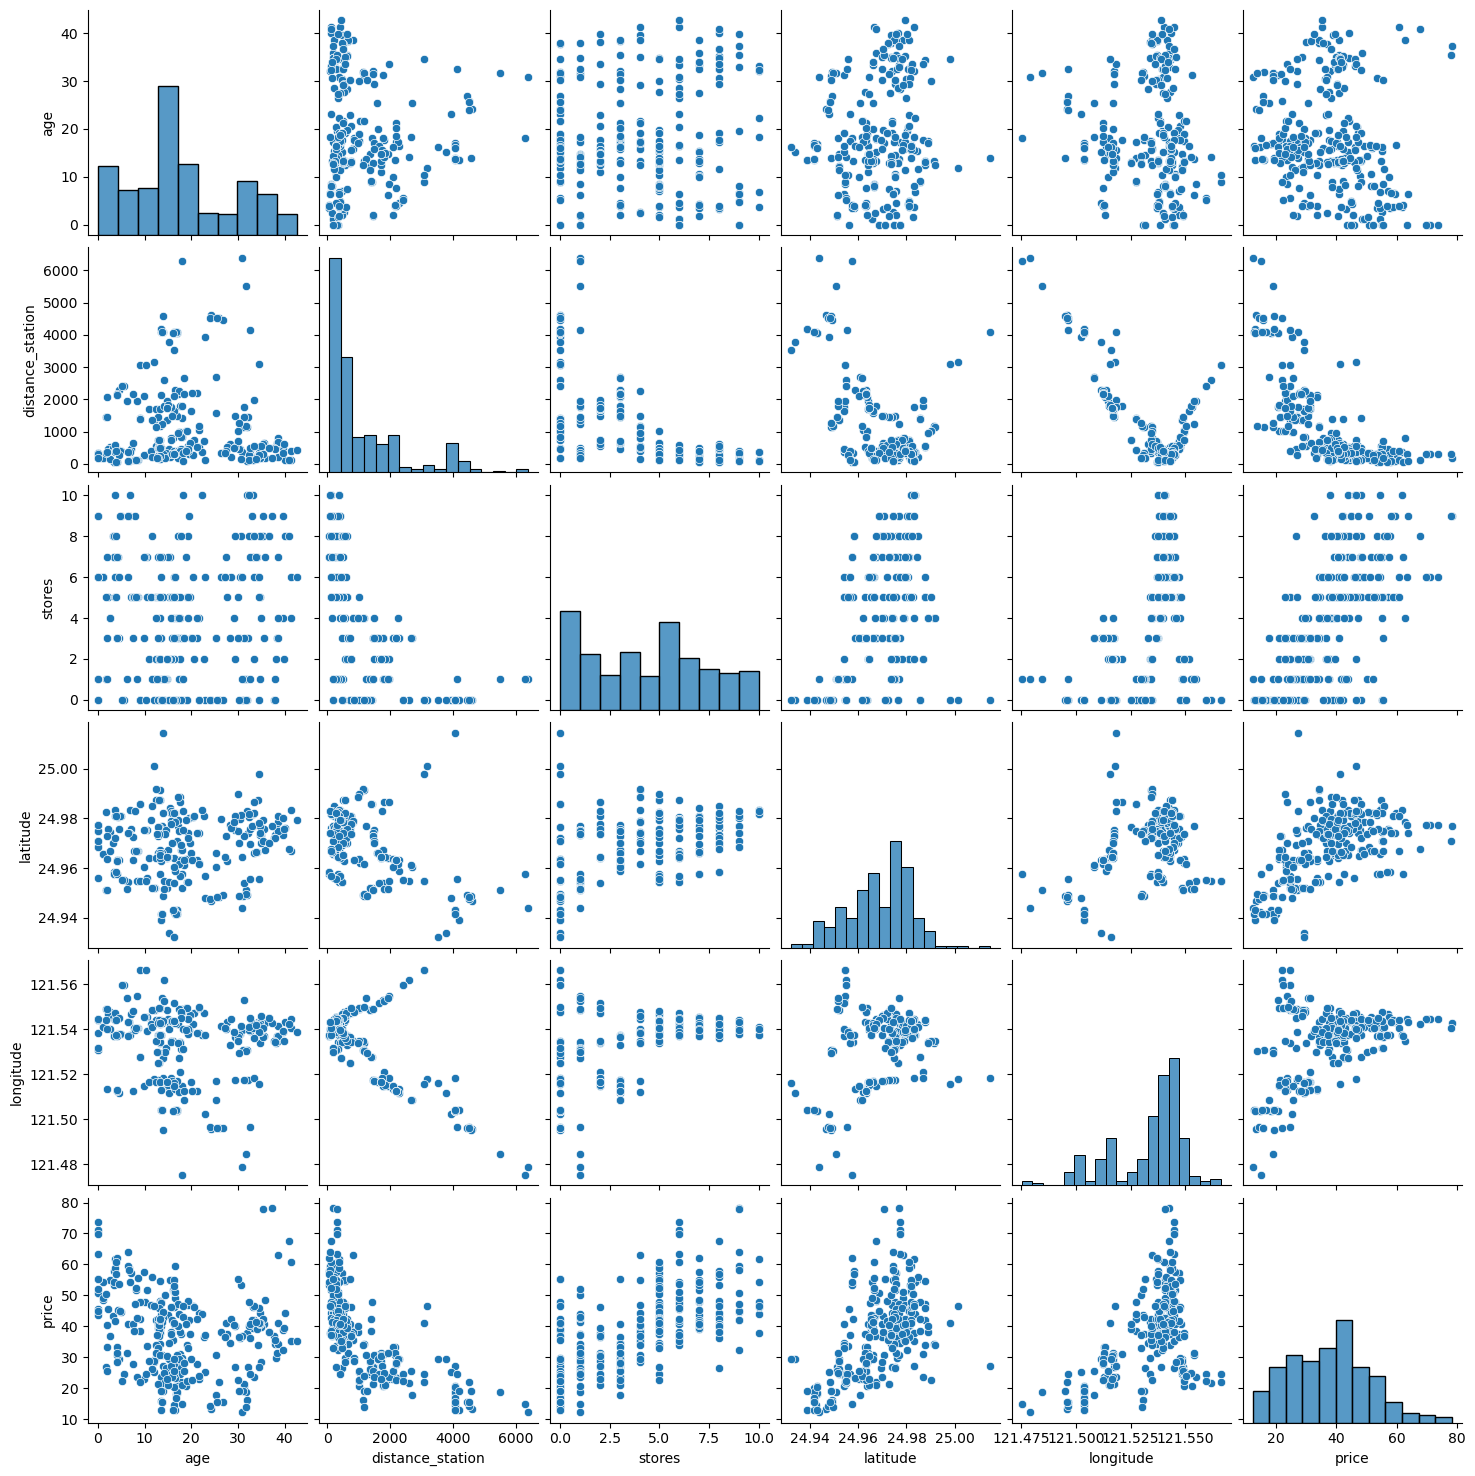

In [16]:
sns.pairplot(num);

In [17]:
num.corr()

,age,distance_station,stores,latitude,longitude,price
age,1.000000,0.000657,0.049288,0.097515,-0.065211,-0.188923
distance_station,0.000657,1.000000,-0.646154,-0.586001,-0.777707,-0.709776
stores,0.049288,-0.646154,1.000000,0.457066,0.433646,0.659825
latitude,0.097515,-0.586001,0.457066,1.000000,0.387364,0.574873
longitude,-0.065211,-0.777707,0.433646,0.387364,1.000000,0.522403
price,-0.188923,-0.709776,0.659825,0.574873,0.522403,1.000000


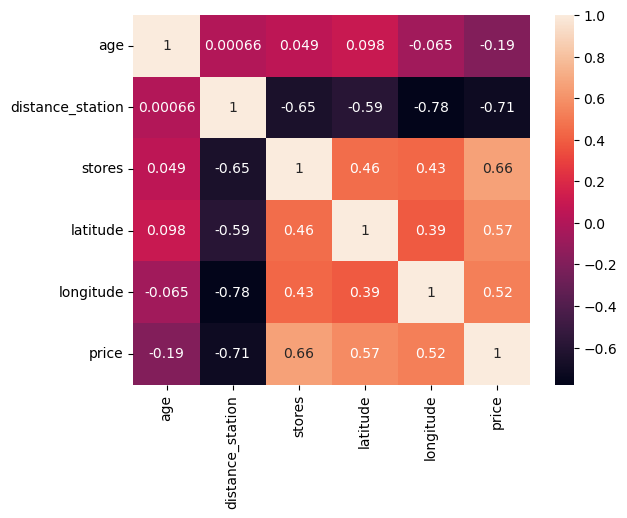

In [18]:
sns.heatmap(num.corr(), annot= True);

### ESTADÍSTICOS Y GRÁFICOS DE LAS VARIABLES NUMÉRICAS

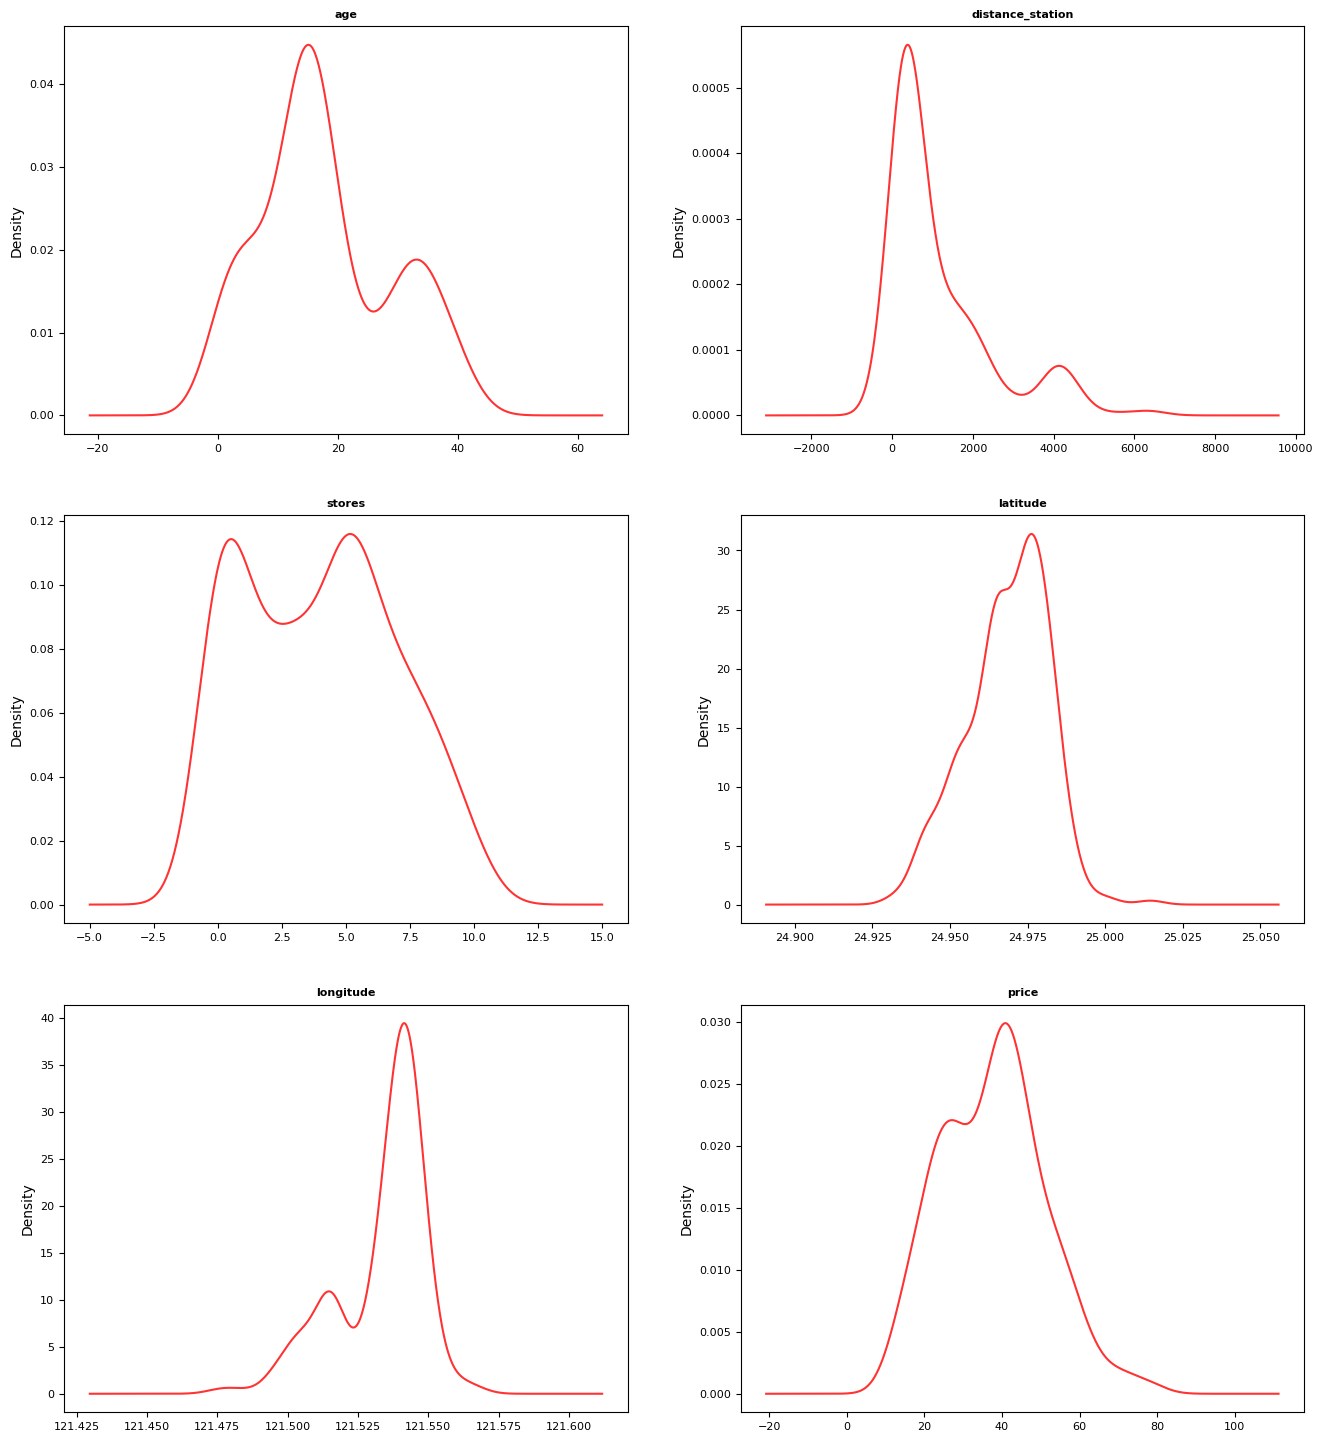

In [19]:
def grafico_eda_continuas(df_cont):
    from math import ceil
    #Calculamos el número de filas que necesitamos
    filas = ceil(df_cont.shape[1]/2)

    #definimos el gráfico
    f, ax = plt.subplots(nrows= filas, ncols= 2, figsize = (16,filas *6))

    #aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2

    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cont):
        df_cont[variable].plot.density(ax = ax[cada], color = 'r', alpha= 0.8)
        ax[cada].set_title(variable, fontsize = 8, fontweight = 'bold')
        ax[cada].tick_params(labelsize = 8)


grafico_eda_continuas(num)

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

In [20]:
# Definir los nombre de los archivos

nombre_cat = 'cat_resultado_eda.pickle'
nombre_num =  'num_resultado_eda.pickle'

cat.to_pickle('../../02_Datos/03_Trabajo/' + nombre_cat)
num.to_pickle('../../02_Datos/03_Trabajo/'+ nombre_num)